<a href="https://colab.research.google.com/github/Mohan0332/PyTorch_Tutorial/blob/master/PyTorch_Chapter01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

#### Linear Regression

In [ ]:
weight = 0.7
bias  = 0.3

X = torch.arange(0,1,0.02).unsqueeze(dim=1)
y = weight * X + bias

In [ ]:
X.shape

torch.Size([50, 1])

In [ ]:
y = weight * X + bias


In [ ]:
X[:10]

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])

In [ ]:
train_split = int(0.8*len(X))
X_train,y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:],y[train_split:]

In [ ]:
#Building a Linear Regression Model

class LinearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))

  def forward(self,x: torch.Tensor)-> torch.Tensor:
    return self.weights * x + self.bias

In [ ]:
model = LinearRegression()
with torch.inference_mode(): #switches off the autograd since gradient descent is not needed for inference
  y_preds = model(X_test)

y_preds

tensor([[-0.1810],
        [-0.1697],
        [-0.1585],
        [-0.1473],
        [-0.1360],
        [-0.1248],
        [-0.1136],
        [-0.1023],
        [-0.0911],
        [-0.0799]])

In [ ]:
list(model.parameters())

[Parameter containing:
 tensor([0.5617], requires_grad=True),
 Parameter containing:
 tensor([-0.6303], requires_grad=True)]

In [ ]:
loss_fnc = nn.L1Loss()

optimizer = torch.optim.SGD(params = model.parameters(),lr=0.01)

In [ ]:
model.state_dict()

OrderedDict([('weights', tensor([0.5617])), ('bias', tensor([-0.6303]))])

In [ ]:
#Training Loop
torch.manual_seed(42)
epochs = 200

epoch_count = []
train_loss_values = []
test_loss_values = []

for epoch in range(epochs):
  model.train()

  y_pred = model(X_train)

  loss = loss_fnc(y_pred,y_train)
  #print(f"Loss: {loss}")

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  #Testing

  model.eval()
  with torch.inference_mode():
    test_pred = model(X_test)
    test_loss = loss_fnc(test_pred,y_test)

  if(epoch%10 == 0):
    epoch_count.append(epoch)
    train_loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")
    print(model.state_dict())

Epoch: 0 | Loss: 0.9842643737792969 | Test Loss: 1.0399516820907593
OrderedDict([('weights', tensor([0.5656])), ('bias', tensor([-0.6203]))])
Epoch: 10 | Loss: 0.8690544366836548 | Test Loss: 0.905241847038269
OrderedDict([('weights', tensor([0.6046])), ('bias', tensor([-0.5203]))])
Epoch: 20 | Loss: 0.7538444399833679 | Test Loss: 0.7705320119857788
OrderedDict([('weights', tensor([0.6436])), ('bias', tensor([-0.4203]))])
Epoch: 30 | Loss: 0.6386346817016602 | Test Loss: 0.6358221769332886
OrderedDict([('weights', tensor([0.6826])), ('bias', tensor([-0.3203]))])
Epoch: 40 | Loss: 0.5234247446060181 | Test Loss: 0.5011122822761536
OrderedDict([('weights', tensor([0.7216])), ('bias', tensor([-0.2203]))])
Epoch: 50 | Loss: 0.4082147479057312 | Test Loss: 0.36640235781669617
OrderedDict([('weights', tensor([0.7606])), ('bias', tensor([-0.1203]))])
Epoch: 60 | Loss: 0.2930047810077667 | Test Loss: 0.23169246315956116
OrderedDict([('weights', tensor([0.7996])), ('bias', tensor([-0.0203]))])

In [ ]:
model.state_dict()

OrderedDict([('weights', tensor([0.7074])), ('bias', tensor([0.3037]))])

In [ ]:
with torch.inference_mode():
  y_preds_postTraining = model(X_test)

y_preds_postTraining

tensor([[0.8696],
        [0.8837],
        [0.8979],
        [0.9120],
        [0.9262],
        [0.9403],
        [0.9545],
        [0.9686],
        [0.9827],
        [0.9969]])

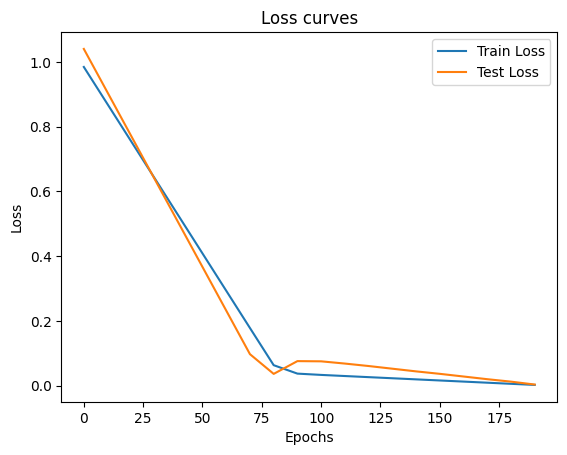

In [ ]:
plt.plot(epoch_count,torch.Tensor(train_loss_values).numpy(), label = "Train Loss")
plt.plot(epoch_count, test_loss_values,label = "Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss curves")
plt.legend()

#### Saving and Loading a model

In [ ]:
#Saving a model
from pathlib import Path

model_path = Path("models")
model_path.mkdir(parents=True,exist_ok=True)

model_name = "pytorch_chapter_01_linreg_model.pth"
model_save_path = model_path / model_name

print(f"Saving model to : {model_save_path}")
torch.save(obj=model.state_dict(),f=model_save_path)

Saving model to : models/pytorch_chapter_01_linreg_model.pth


In [ ]:
#Loading a model, Note: we are only saving a loading the state_dict not the whole model.

loaded_model = LinearRegression()

loaded_model.load_state_dict(torch.load(f=model_save_path))

<All keys matched successfully>

In [ ]:
loaded_model.state_dict()

OrderedDict([('weights', tensor([0.7074])), ('bias', tensor([0.3037]))])